In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib as mpl
pd.set_option('display.max_columns', None)
import re
import numpy as np
import missingno as msno
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline
mpl.rcParams['figure.figsize'] = (14, 6)
mpl.rcParams['axes.grid'] = False
sns.set_style("darkgrid")
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [13]:
test = pd.read_csv("/content/drive/MyDrive/Major Project/test_basic_preprocessed.csv")

In [14]:
df = pd.read_csv("/content/drive/MyDrive/Major Project/basic_preprocessed.csv")
df.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_missing,and payday loan,credit-builder loan,personal loan,and student loan,and auto loan,auto loan,not specified,home equity loan,payday loan,and debt consolidation loan,debt consolidation loan,and not specified,and credit-builder loan,student loan,mortgage loan,and home equity loan,and personal loan,and mortgage loan
0,0x1602,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,4.0,4.0,_,809.98,26.822620,26.822620,No,49,49.0,High_spent_Small_value_payments,49.0,Good,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0x1606,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,12.0,4.0,4.0,Good,809.98,24.797347,24.797347,No,49,49.0,High_spent_Medium_value_payments,49.0,Good,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0x1608,July,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8.0,4.0,4.0,Good,809.98,22.537593,22.537593,No,49,49.0,Low_spent_Small_value_payments,49.0,Good,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0x1609,August,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6.0,4.0,4.0,Good,809.98,23.933795,23.933795,No,49,49.0,High_spent_Medium_value_payments,49.0,Standard,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0x160e,January,28.0,_______,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,3,4.0,2.0,2.0,Good,605.03,24.464031,24.464031,No,18,18.0,Low_spent_Small_value_payments,18.0,Standard,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.shape

(99356, 44)

In [16]:
df.drop(['ID','Type_of_Loan'],axis=1,inplace=True)
test.drop(['ID','Type_of_Loan'],axis=1,inplace=True)

In [17]:
test.shape

(50000, 41)

In [18]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_missing,and payday loan,credit-builder loan,personal loan,and student loan,and auto loan,auto loan,not specified,home equity loan,payday loan,and debt consolidation loan,debt consolidation loan,and not specified,and credit-builder loan,student loan,mortgage loan,and home equity loan,and personal loan,and mortgage loan
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,4.0,4.0,_,809.98,26.822620,26.822620,No,49,49.0,High_spent_Small_value_payments,49.0,Good,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,12.0,4.0,4.0,Good,809.98,24.797347,24.797347,No,49,49.0,High_spent_Medium_value_payments,49.0,Good,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,July,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,8.0,4.0,4.0,Good,809.98,22.537593,22.537593,No,49,49.0,Low_spent_Small_value_payments,49.0,Good,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,August,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,6.0,4.0,4.0,Good,809.98,23.933795,23.933795,No,49,49.0,High_spent_Medium_value_payments,49.0,Standard,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,January,28.0,_______,34847.84,3037.986667,2,4,6,1.0,3,4.0,2.0,2.0,Good,605.03,24.464031,24.464031,No,18,18.0,Low_spent_Small_value_payments,18.0,Standard,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X = df.drop(['Credit_Score'],axis=1)
cat_col = [col for col in X.columns if df[col].dtypes == 'O']
cat_col

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',drop='first')
temp = pd.DataFrame(enc.fit_transform(X[cat_col]).toarray())
test_temp = pd.DataFrame(enc.transform(test[cat_col]).toarray())

In [21]:
final_df = X.drop(cat_col,axis=1)
final_test = test.drop(cat_col,axis=1)
final_df = pd.concat([final_df,temp],axis=1)
final_test = pd.concat([final_test,test_temp],axis=1)

In [22]:
final_df.shape

(99356, 69)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final_df = pd.DataFrame(scaler.fit_transform(final_df))
final_test = pd.DataFrame(scaler.fit_transform(final_test))
final_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.220922,-0.107572,-0.123526,-0.123526,-0.536465,-1.067291,-1.067291,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.40954,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,-0.377956,-0.377764,2.645325,-0.377973,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,-0.561898,-0.761685,1.989070,1.352987,-1.054803,-0.398352,-0.461155,2.795846,-0.341097,-0.401027,-0.585749
1,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.019115,-0.085064,-0.123526,-0.123526,-0.536465,-1.463174,-1.463174,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.40954,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,-0.377956,-0.377764,-0.378025,-0.377973,-0.377886,-0.37806,2.644717,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,2.168467,-0.357674,-0.341097,-0.401027,-0.585749
2,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.220922,-0.103071,-0.123526,-0.123526,-0.536465,-1.904891,-1.904891,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.40954,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,-0.377956,-0.377764,-0.378025,2.645690,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,-0.461155,-0.357674,-0.341097,-0.401027,1.707215
3,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.220922,-0.112074,-0.123526,-0.123526,-0.536465,-1.631974,-1.631974,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.40954,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,2.645812,-0.377764,-0.378025,-0.377973,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,2.168467,-0.357674,-0.341097,-0.401027,-0.585749
4,-0.133677,-0.098913,-0.333243,-0.128626,-0.143286,-0.142803,-0.158127,-1.220922,-0.121077,-0.133971,-0.133971,-0.713606,-1.528328,-1.528328,-0.166670,-0.166670,-0.166670,-0.357745,-0.312839,1.40954,-0.613972,-0.310877,-0.298669,-0.618371,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,-0.308281,-0.308437,-0.303955,-0.377956,-0.377764,2.645325,-0.377973,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,-0.259599,-0.257339,-0.250012,3.628135,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,-0.461155,-0.357674,-0.341097,-0.401027,1.707215


In [25]:
final_df.shape

(99356, 69)

In [26]:
final_df = pd.concat([final_df,df['Credit_Score']],axis=1)
final_df['Credit_Score'] = df['Credit_Score'].map({"Good":2,"Standard":1,"Poor":0})
final_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,Credit_Score
0,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.220922,-0.107572,-0.123526,-0.123526,-0.536465,-1.067291,-1.067291,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.40954,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,-0.377956,-0.377764,2.645325,-0.377973,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,-0.561898,-0.761685,1.989070,1.352987,-1.054803,-0.398352,-0.461155,2.795846,-0.341097,-0.401027,-0.585749,2
1,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.019115,-0.085064,-0.123526,-0.123526,-0.536465,-1.463174,-1.463174,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.40954,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,-0.377956,-0.377764,-0.378025,-0.377973,-0.377886,-0.37806,2.644717,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,2.168467,-0.357674,-0.341097,-0.401027,-0.585749,2
2,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.220922,-0.103071,-0.123526,-0.123526,-0.536465,-1.904891,-1.904891,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.40954,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,-0.377956,-0.377764,-0.378025,2.645690,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,-0.461155,-0.357674,-0.341097,-0.401027,1.707215,2
3,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.220922,-0.112074,-0.123526,-0.123526,-0.536465,-1.631974,-1.631974,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.40954,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,2.645812,-0.377764,-0.378025,-0.377973,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,2.168467,-0.357674,-0.341097,-0.401027,-0.585749,1
4,-0.133677,-0.098913,-0.333243,-0.128626,-0.143286,-0.142803,-0.158127,-1.220922,-0.121077,-0.133971,-0.133971,-0.713606,-1.528328,-1.528328,-0.166670,-0.166670,-0.166670,-0.357745,-0.312839,1.40954,-0.613972,-0.310877,-0.298669,-0.618371,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,-0.308281,-0.308437,-0.303955,-0.377956,-0.377764,2.645325,-0.377973,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,-0.259599,-0.257339,-0.250012,3.628135,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,-0.461155,-0.357674,-0.341097,-0.401027,1.707215,1


In [28]:
final_test.shape

(50000, 69)

In [29]:
final_df.to_csv("/content/drive/MyDrive/Major Project/final_data.csv",index=False)
final_test.to_csv("/content/drive/MyDrive/Major Project/final_test.csv",index=False)

In [47]:
train = pd.read_csv("/content/drive/MyDrive/Major Project/final_data.csv")
final_test = pd.read_csv("/content/drive/MyDrive/Major Project/final_test.csv")

In [48]:
train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,Credit_Score
0,0,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.220922,-0.107572,-0.123526,-0.123526,-0.536465,-1.067291,-1.067291,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.40954,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,-0.377956,-0.377764,2.645325,-0.377973,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,-0.561898,-0.761685,1.989070,1.352987,-1.054803,-0.398352,-0.461155,2.795846,-0.341097,-0.401027,-0.585749,2
1,1,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.019115,-0.085064,-0.123526,-0.123526,-0.536465,-1.463174,-1.463174,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.40954,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,-0.377956,-0.377764,-0.378025,-0.377973,-0.377886,-0.37806,2.644717,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,2.168467,-0.357674,-0.341097,-0.401027,-0.585749,2
2,2,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.220922,-0.103071,-0.123526,-0.123526,-0.536465,-1.904891,-1.904891,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.40954,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,-0.377956,-0.377764,-0.378025,2.645690,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,-0.461155,-0.357674,-0.341097,-0.401027,1.707215,2
3,3,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.220922,-0.112074,-0.123526,-0.123526,-0.536465,-1.631974,-1.631974,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.40954,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,2.645812,-0.377764,-0.378025,-0.377973,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,2.168467,-0.357674,-0.341097,-0.401027,-0.585749,1
4,4,-0.133677,-0.098913,-0.333243,-0.128626,-0.143286,-0.142803,-0.158127,-1.220922,-0.121077,-0.133971,-0.133971,-0.713606,-1.528328,-1.528328,-0.166670,-0.166670,-0.166670,-0.357745,-0.312839,1.40954,-0.613972,-0.310877,-0.298669,-0.618371,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,-0.308281,-0.308437,-0.303955,-0.377956,-0.377764,2.645325,-0.377973,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.25909,-0.257516,-0.250489,-0.259599,-0.257339,-0.250012,3.628135,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,-0.461155,-0.357674,-0.341097,-0.401027,1.707215,1


In [49]:
train.rename(columns={'Unnamed: 0':'idx'},inplace=True)

In [50]:
X = train.drop(['Credit_Score','idx'],axis=1)
y = train['Credit_Score']

In [51]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.220922,-0.107572,-0.123526,-0.123526,-0.536465,-1.067291,-1.067291,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.409540,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,-0.377956,-0.377764,2.645325,-0.377973,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.259090,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,-0.561898,-0.761685,1.989070,1.352987,-1.054803,-0.398352,-0.461155,2.795846,-0.341097,-0.401027,-0.585749
1,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.019115,-0.085064,-0.123526,-0.123526,-0.536465,-1.463174,-1.463174,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.409540,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,-0.377956,-0.377764,-0.378025,-0.377973,-0.377886,-0.37806,2.644717,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.259090,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,2.168467,-0.357674,-0.341097,-0.401027,-0.585749
2,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.220922,-0.103071,-0.123526,-0.123526,-0.536465,-1.904891,-1.904891,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.409540,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,-0.377956,-0.377764,-0.378025,2.645690,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.259090,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,-0.461155,-0.357674,-0.341097,-0.401027,1.707215
3,-0.140985,-0.109921,-0.744014,-0.120095,-0.143286,-0.149222,-0.109518,-1.220922,-0.112074,-0.123526,-0.123526,-0.536465,-1.631974,-1.631974,-0.162938,-0.162938,-0.162938,-0.357745,-0.312839,1.409540,1.628740,-0.310877,-0.298669,1.617152,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,3.243795,-0.308437,-0.303955,2.645812,-0.377764,-0.378025,-0.377973,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.259090,-0.257516,-0.250489,3.852100,-0.257339,-0.250012,-0.275624,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,2.168467,-0.357674,-0.341097,-0.401027,-0.585749
4,-0.133677,-0.098913,-0.333243,-0.128626,-0.143286,-0.142803,-0.158127,-1.220922,-0.121077,-0.133971,-0.133971,-0.713606,-1.528328,-1.528328,-0.166670,-0.166670,-0.166670,-0.357745,-0.312839,1.409540,-0.613972,-0.310877,-0.298669,-0.618371,-0.652132,-0.648137,-0.668824,-0.308516,-0.600681,-0.307203,-0.305355,-0.616256,-0.660561,-0.308281,-0.308437,-0.303955,-0.377956,-0.377764,2.645325,-0.377973,-0.377886,-0.37806,-0.378112,-0.260415,-0.257561,-0.254571,-0.260305,-0.256448,-0.25466,-0.265512,-0.252412,-0.259090,-0.257516,-0.250489,-0.259599,-0.257339,-0.250012,3.628135,1.779682,-0.761685,-0.502747,1.352987,-1.054803,-0.398352,-0.461155,-0.357674,-0.341097,-0.401027,1.707215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99351,-0.098598,-0.025841,2.491665,-0.120095,-0.151033,-0.136383,-0.174330,-0.750040,-0.139084,-0.128748,-0.128748

In [52]:
print(X.shape)
print(y.shape)

(99356, 69)
(99356,)


In [53]:
y.value_counts()

1    52927
0    28914
2    17515
Name: Credit_Score, dtype: int64

In [54]:
X_train,X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)

In [55]:
print(y_test.value_counts())
print(y_train.value_counts())

1    10586
0     5783
2     3503
Name: Credit_Score, dtype: int64
1    42341
0    23131
2    14012
Name: Credit_Score, dtype: int64


In [56]:
# import library
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5, n_jobs=-1)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [57]:
y_smote.value_counts()

2    42341
1    42341
0    42341
Name: Credit_Score, dtype: int64

In [58]:
X_train,X_val, y_train, y_val = train_test_split(x_smote, y_smote,stratify=y_smote, test_size=0.1)

In [59]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in val data :",X_val.shape)

Number of data points in train data : (114320, 69)
Number of data points in val data : (12703, 69)


In [60]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
# print(train_distr)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len,"Class 2: ", int(train_distr[2])/train_len)
print("-"*10, "Distribution of output variable in Validation data", "-"*10)
val_distr = Counter(y_val)
val_len = len(y_val)
print("Class 0: ",int(val_distr[0])/val_len,"Class 1: ", int(val_distr[1])/val_len,"Class 2: ", int(val_distr[2])/val_len)
print("-"*10, "Distribution of output variable in Test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len,"Class 1: ", int(test_distr[1])/test_len,"Class 2: ", int(test_distr[2])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.33333624912526244 Class 1:  0.33333624912526244 Class 2:  0.3333275017494752
---------- Distribution of output variable in Validation data ----------
Class 0:  0.3333070928127214 Class 1:  0.3333070928127214 Class 2:  0.33338581437455717
---------- Distribution of output variable in Test data ----------
Class 0:  0.2910124798711755 Class 1:  0.5327093397745571 Class 2:  0.17627818035426732


In [61]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = ['Poor','Standard','Good']
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> Random Model </h2>

AUC Score on test data using Random Model 0.49868490837302076


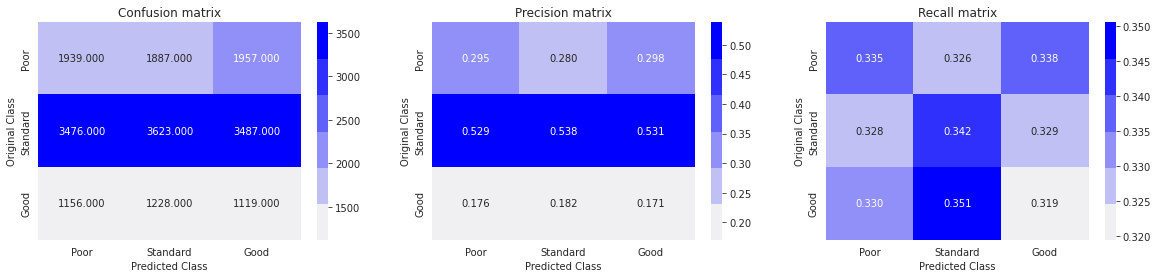

In [62]:
predicted_y = np.zeros((test_len,3))
for i in range(len(y_test)):
    rand_probs = np.random.rand(1,3)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("AUC Score on test data using Random Model",roc_auc_score(y_test,predicted_y,average='weighted',multi_class='ovr'))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> KNN with hyperparameter tuning </h2>

For values of best k =  1 The val log loss is: 0.47890661895344017
For values of best k =  1 The test log loss is: 0.4659009712585698
Total number of data points : 19872


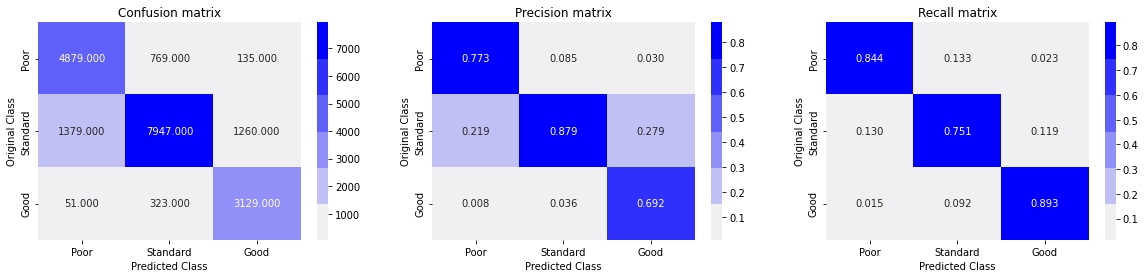

In [ ]:
k = [x for x in [1,5,10,20,30]]

roc_auc_array=[]
for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    # clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_val)
    roc_auc_array.append(roc_auc_score(y_val,predict_y,average='weighted',multi_class='ovr'))
    print('For values of k = ', i, "The roc auc score for val data is:",roc_auc_score(y_val,predict_y,average='weighted',multi_class='ovr'))

plt.figure(figsize=(8,6))
fig, ax = plt.subplots()
ax.plot(k, roc_auc_array,c='g')
for i, txt in enumerate(np.round(roc_auc_array,3)):
    ax.annotate((k[i],np.round(txt,3)), (k[i],roc_auc_array[i]))
plt.grid()
plt.title("Cross Validation Score for each k")
plt.xlabel("k")
plt.ylabel("AUC Score")
plt.show()


best_k = np.argmin(roc_auc_array)
clf = KNeighborsClassifier(n_neighbors=5)
# clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_val)
print('For values of best k = ', k[best_k], "The val auc score is:",roc_auc_score(y_val,predict_y,average='weighted',multi_class='ovr'))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best k = ', k[best_k], "The test auc score is:",roc_auc_score(y_test,predict_y,average='weighted',multi_class='ovr'))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of best k =  1 The train log loss is: 0.16031628382978919
For values of best k =  1 The test log loss is: 0.39251958977718465
Total number of data points : 31757


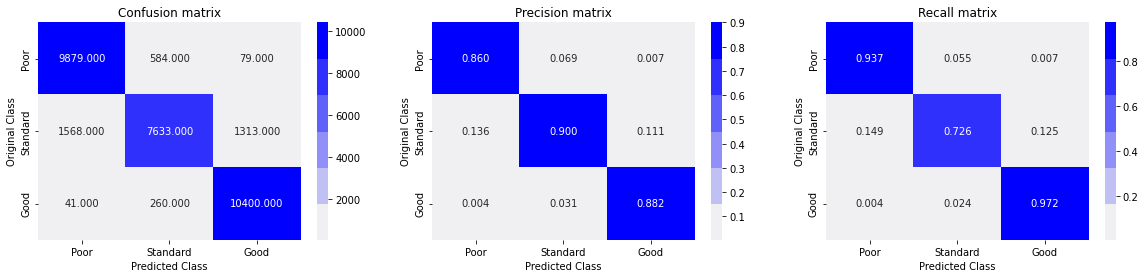

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best k = ', k[best_k], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best k = ', k[best_k], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  0.001 The auc score for train data is: 0.804126317040563
For values of alpha =  0.001 The auc score for val data is: 0.8084834446049664
------------------------------------------------------------------------------------------------------------------------
For values of alpha =  0.01 The auc score for train data is: 0.8046769467173351
For values of alpha =  0.01 The auc score for val data is: 0.8089265502541101
------------------------------------------------------------------------------------------------------------------------
For values of alpha =  0.1 The auc score for train data is: 0.80470686371013
For values of alpha =  0.1 The auc score for val data is: 0.8089385078582174
------------------------------------------------------------------------------------------------------------------------
For values of alpha =  0.5 The auc score for train data is: 0.8047087539074934
For values of alpha =  0.5 The auc score for val data is: 0.8089365746306247
----------

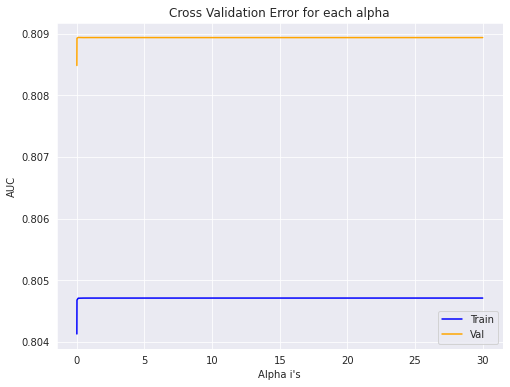

In [67]:
alpha = [x for x in [0.001,0.01,0.1,0.5,1,10,30]]

auc_score_train_array=[]
auc_score_val_array=[]
for i in alpha:
    lr = LogisticRegression(C=i, penalty='l2', random_state=42,multi_class='ovr')
    lr.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_train)
    auc_score_train_array.append(roc_auc_score(y_train,predict_y,average='weighted',multi_class='ovr'))
    print('For values of alpha = ', i, "The auc score for train data is:",roc_auc_score(y_train,predict_y,average='weighted',multi_class='ovr'))
    predict_y = sig_clf.predict_proba(X_val)
    auc_score_val_array.append(roc_auc_score(y_val,predict_y,average='weighted',multi_class='ovr'))
    print('For values of alpha = ', i, "The auc score for val data is:",roc_auc_score(y_val,predict_y,average='weighted',multi_class='ovr'))
    print("-"*120)

plt.figure(figsize=(8,6))
plt.plot(alpha,auc_score_train_array,color='blue',label='Train')
plt.plot(alpha,auc_score_val_array,color='orange',label='Val')
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("AUC")
plt.legend()
plt.show()


For values of best alpha =  0.1 The train auc score is: 0.80470686371013
For values of best alpha =  0.1 The val auc score is: 0.8089385078582174
For values of best alpha =  0.1 The test auc score is: 0.7476327642371299
Total number of data points : 19872


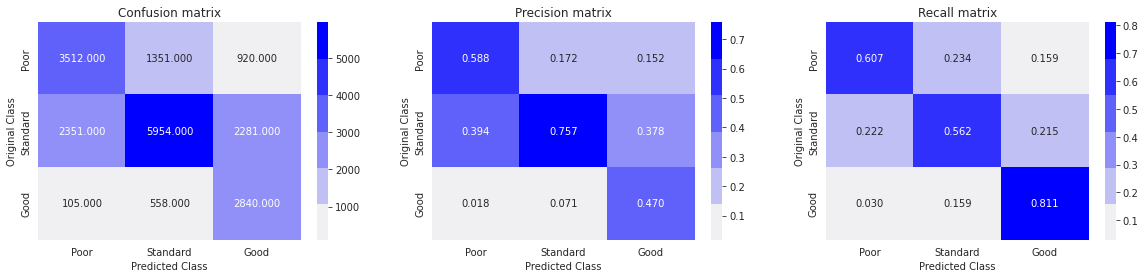

In [68]:
best_alpha = np.argmax(auc_score_val_array)
lr = LogisticRegression(C=alpha[best_alpha], penalty='l2', random_state=42,multi_class='ovr')
# clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train auc score is:",roc_auc_score(y_train,predict_y,average='weighted',multi_class='ovr'))
predict_y = sig_clf.predict_proba(X_val)
print('For values of best alpha = ', alpha[best_alpha], "The val auc score is:",roc_auc_score(y_val,predict_y,average='weighted',multi_class='ovr'))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test auc score is:",roc_auc_score(y_test,predict_y,average='weighted',multi_class='ovr'))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 1.0986273007470244
For values of alpha =  0.0001 The log loss is: 1.0986273007470244
For values of alpha =  0.001 The log loss is: 0.8498210842078864
For values of alpha =  0.01 The log loss is: 0.8423763217962877
For values of alpha =  0.1 The log loss is: 0.8975092665213746
For values of alpha =  1 The log loss is: 1.0951014641496177
For values of alpha =  10 The log loss is: 1.0958767956230888


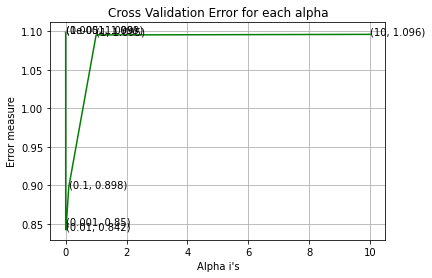

For values of best alpha =  0.01 The train log loss is: 0.8422884130342398
For values of best alpha =  0.01 The test log loss is: 0.8423763217962877
Total number of data points : 31757


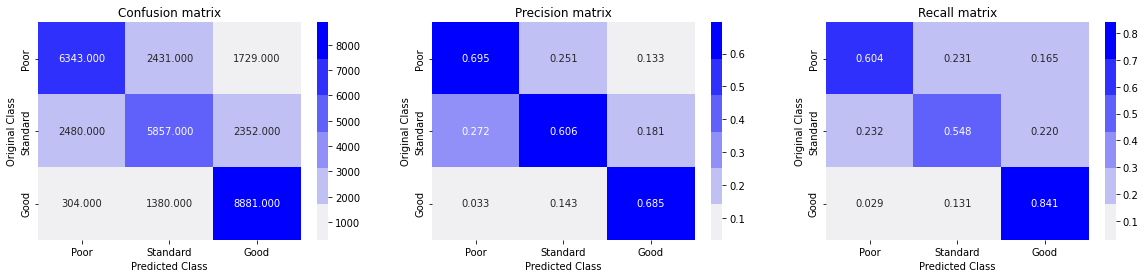

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    # clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_val)
    log_error_array.append(log_loss(y_val, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss for val data is:",log_loss(y_val, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
# clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_val)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_val, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
from sklearn.metrics import roc_auc_score
predict_y = sig_clf.predict_proba(X_train)
print("The train roc_auc_score: {}".format(roc_auc_score(y_train,predict_y,average='weighted',multi_class='ovr')))
predict_y = sig_clf.predict_proba(X_test)
print("The test roc_auc_score: {}".format(roc_auc_score(y_test, predict_y,average='weighted',multi_class='ovr')))

The train roc_auc_score: 0.7975902219933929
The test roc_auc_score: 0.7974712205168348


<h2>XGBoost </h2>

The train roc_auc score for n_est 10 is: 0.8624345422042468
The val roc_auc score for n_est 10 is: 0.8631535075495436
------------------------------------------------------------------------------------------------------------------------
The train roc_auc score for n_est 30 is: 0.8779088060516224
The val roc_auc score for n_est 30 is: 0.8777291418832212
------------------------------------------------------------------------------------------------------------------------
The train roc_auc score for n_est 50 is: 0.8917075454816247
The val roc_auc score for n_est 50 is: 0.8912354345097309
------------------------------------------------------------------------------------------------------------------------
The train roc_auc score for n_est 100 is: 0.9088210926852645
The val roc_auc score for n_est 100 is: 0.9076409141443634
------------------------------------------------------------------------------------------------------------------------
The train roc_auc score for n_est 150 is: 

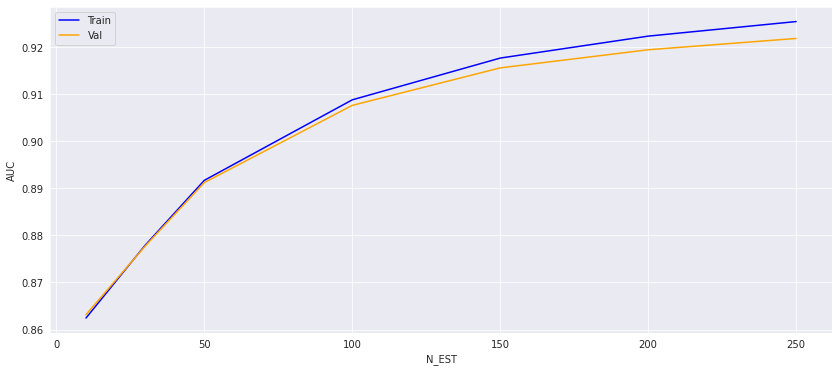

In [69]:
import xgboost as xgb
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "roc_auc_score"
param['eta'] = 0.3
param['gamma'] = 0
param['max_depth'] = 6
param['min_child_weight']=1
param['max_delta_step'] = 0
param['subsample']= 1
param['colsample_bytree']=1
param['silent'] = 1
param['seed'] = 0
param['base_score'] = 0.5


n_est = [10,30,50,100,150,200,250]
train_auc = []
val_auc = []
for est in n_est:
    xgb_model = xgb.XGBClassifier(random_state=42,n_estimators=est,params=param)
    xgb_model.fit(X_train,y_train)
    X_train_predict = xgb_model.predict_proba(X_train) 
    X_val_predict = xgb_model.predict_proba(X_val)


    print("The train roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_train, X_train_predict,average='weighted',multi_class='ovr')))
    print("The val roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_val, X_val_predict,average='weighted',multi_class='ovr')))
    
    train_auc.append(roc_auc_score(y_train, X_train_predict,average='weighted',multi_class='ovr'))
    val_auc.append(roc_auc_score(y_val, X_val_predict,average='weighted',multi_class='ovr'))

    print('-'*120)



plt.plot(n_est,train_auc,color='blue',label='Train')
plt.plot(n_est,val_auc,color='orange',label='Val')
plt.xlabel("N_EST")
plt.ylabel("AUC")
plt.legend()
plt.show()

The train roc_auc score for n_est 100 is: 0.9088210926852645
The val roc_auc score for n_est 100 is: 0.9076409141443634
The test roc_auc score for n_est 100 is: 0.8249578084097037
------------------------------------------------------------------------------------------------------------------------
Total number of data points : 19872


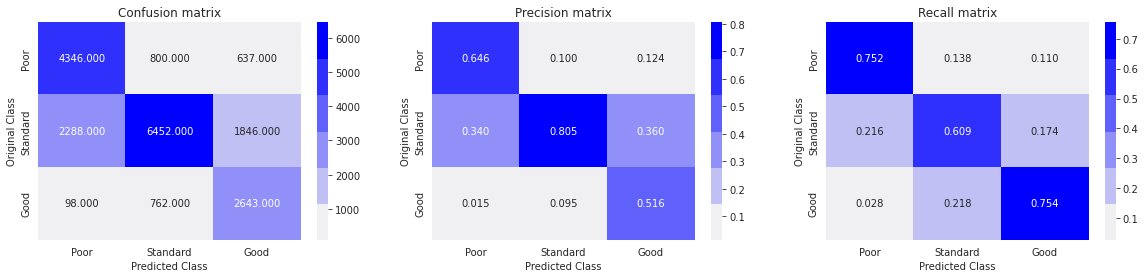

In [70]:
# XgBoost with 100 base estimator
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "roc_auc_score"
param['eta'] = 0.3
param['gamma'] = 0
param['max_depth'] = 6
param['min_child_weight']=1
param['max_delta_step'] = 0
param['subsample']= 1
param['colsample_bytree']=1
param['silent'] = 1
param['seed'] = 0
param['base_score'] = 0.5
est = 100
xgb_model = xgb.XGBClassifier(random_state=42,n_estimators=est)
xgb_model.fit(X_train,y_train)
X_train_predict = xgb_model.predict_proba(X_train)
X_val_predict = xgb_model.predict_proba(X_val)  
X_test_predict = xgb_model.predict_proba(X_test)

print("The train roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_train, X_train_predict,average='weighted',multi_class='ovr')))
print("The val roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_val, X_val_predict,average='weighted',multi_class='ovr')))
print("The test roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_test, X_test_predict,average='weighted',multi_class='ovr')))
print('-'*120)
predicted_y =np.argmax(X_test_predict,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> Random Forest </h2>

The train roc_auc score for n_est 1 is: 0.9213916393087689
The Val roc_auc score for n_est 1 is: 0.7885752844029851
------------------------------------------------------------------------------------------------------------------------
The train roc_auc score for n_est 10 is: 0.9998463732577898
The Val roc_auc score for n_est 10 is: 0.9386501348687015
------------------------------------------------------------------------------------------------------------------------
The train roc_auc score for n_est 50 is: 0.9999999724539661
The Val roc_auc score for n_est 50 is: 0.9564923814912647
------------------------------------------------------------------------------------------------------------------------
The train roc_auc score for n_est 60 is: 0.9999999917361843
The Val roc_auc score for n_est 60 is: 0.9571873536291506
------------------------------------------------------------------------------------------------------------------------
The train roc_auc score for n_est 70 is: 0.999

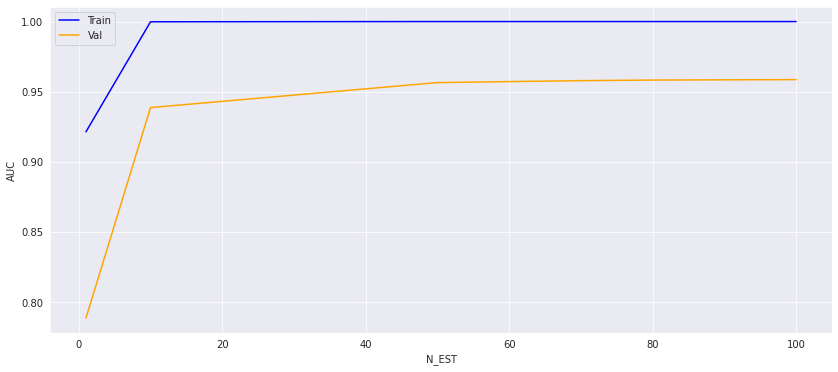

In [71]:
from sklearn.ensemble import RandomForestClassifier

train_auc = []
val_auc = []
n_est = [1,10,50,60,70,80,90,100]
for est in n_est:
    rf = RandomForestClassifier(random_state=0,n_estimators=est)
    rf.fit(X_train,y_train)
    X_train_predict = rf.predict_proba(X_train)
    X_val_predict = rf.predict_proba(X_val)

    print("The train roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_train, X_train_predict,average='weighted',multi_class='ovr')))
    print("The Val roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_val, X_val_predict,average='weighted',multi_class='ovr')))
  
    train_auc.append(roc_auc_score(y_train, X_train_predict,average='weighted',multi_class='ovr'))
    val_auc.append(roc_auc_score(y_val, X_val_predict,average='weighted',multi_class='ovr'))

    print('-'*120)



plt.plot(n_est,train_auc,color='blue',label='Train')
plt.plot(n_est,val_auc,color='orange',label='Val')
plt.xlabel("N_EST")
plt.ylabel("AUC")
plt.legend()
plt.show()


The train roc_auc score for n_est 70 is: 0.9999999987948593
The val roc_auc score for n_est 70 is: 0.9578622591216177
The test roc_auc score for n_est 70 is: 0.8948930311741747
Total number of data points : 19872


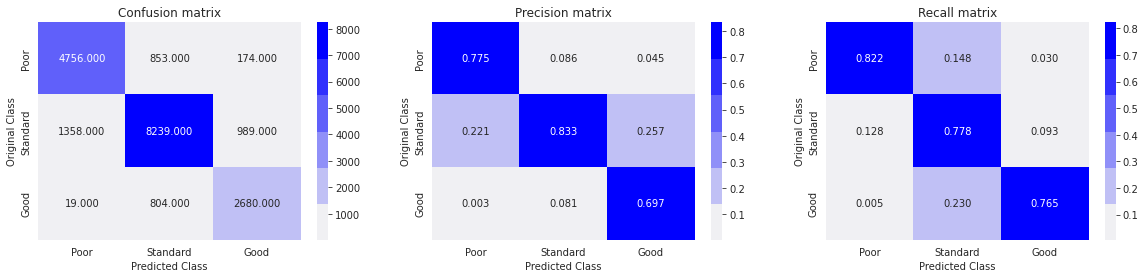

In [72]:
est = 70
rf = RandomForestClassifier(random_state=0,n_estimators=est)
rf.fit(X_train,y_train)
X_train_predict = rf.predict_proba(X_train)
X_val_predict = rf.predict_proba(X_val)

print("The train roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_train, X_train_predict,average='weighted',multi_class='ovr')))     
print("The val roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_val, X_val_predict,average='weighted',multi_class='ovr')))

X_test_predict = rf.predict_proba(X_test)
print("The test roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_test, X_test_predict,average='weighted',multi_class='ovr')))

predicted_y =np.argmax(X_test_predict,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      5783
           1       0.83      0.78      0.80     10586
           2       0.70      0.77      0.73      3503

    accuracy                           0.79     19872
   macro avg       0.77      0.79      0.78     19872
weighted avg       0.79      0.79      0.79     19872



<h2> Stacking </h2>

The train roc_auc score for n_est 5 is: 0.9864640890666538
The Val roc_auc score for n_est 5 is: 0.8848980089006591
------------------------------------------------------------------------------------------------------------------------
The train roc_auc score for n_est 10 is: 0.9956335835750427
The Val roc_auc score for n_est 10 is: 0.8890687829998911
------------------------------------------------------------------------------------------------------------------------
The train roc_auc score for n_est 25 is: 0.9994122244406974
The Val roc_auc score for n_est 25 is: 0.8993431260936275
------------------------------------------------------------------------------------------------------------------------
The train roc_auc score for n_est 50 is: 0.9998951525995179
The Val roc_auc score for n_est 50 is: 0.9023946957474737
------------------------------------------------------------------------------------------------------------------------
The train roc_auc score for n_est 70 is: 0.999

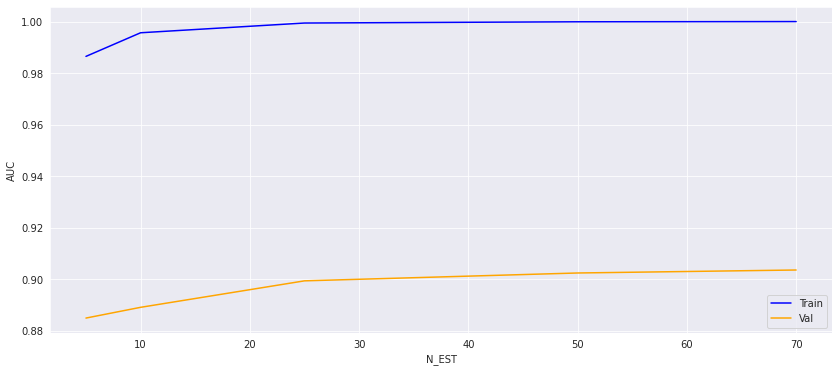

In [98]:
n_est = [5,10,25,50,70]
train_auc = []
val_auc = []

for est in n_est:
    clf1 = RandomForestClassifier(random_state=32,n_estimators=est)
    clf2 = xgb.XGBClassifier(random_state=42,n_estimators=est)
    lr = LogisticRegression()
    clf = StackingClassifier(classifiers=[clf1, clf2], 
                            meta_classifier=lr)
    clf.fit(X_train,y_train)
    X_train_predict = clf.predict_proba(X_train)
    X_val_predict = clf.predict_proba(X_val)
    print("The train roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_train, X_train_predict,average='weighted',multi_class='ovr')))
    print("The Val roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_val, X_val_predict,average='weighted',multi_class='ovr')))

    train_auc.append(roc_auc_score(y_train, X_train_predict,average='weighted',multi_class='ovr'))
    val_auc.append(roc_auc_score(y_val, X_val_predict,average='weighted',multi_class='ovr'))

    print('-'*120)


plt.plot(n_est,train_auc,color='blue',label='Train')
plt.plot(n_est,val_auc,color='orange',label='Val')
plt.xlabel("N_EST")
plt.ylabel("AUC")
plt.legend()
plt.show()

The train roc_auc score for n_est 70 is: 0.9864640890666538
The Val roc_auc score for n_est 70 is: 0.8848980089006591
The test roc_auc score for n_est 70 is: 0.8008692157951183
Total number of data points : 19872


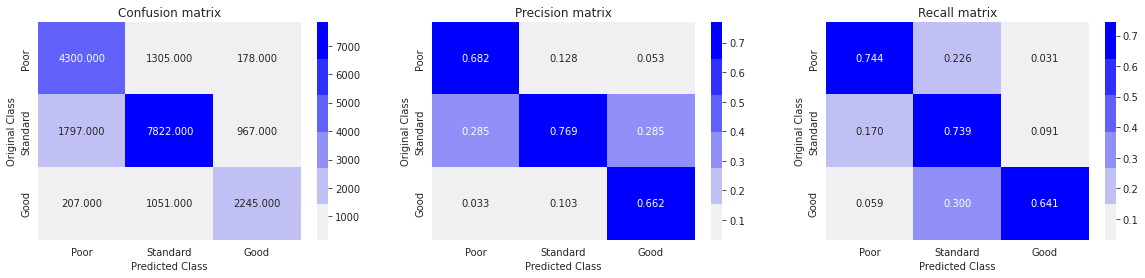

In [99]:
clf1 = RandomForestClassifier(random_state=32,n_estimators=5)
clf2 = xgb.XGBClassifier(random_state=42,n_estimators=5)
lr = LogisticRegression()
clf = StackingClassifier(classifiers=[clf1, clf2], 
                        meta_classifier=lr)
clf.fit(X_train,y_train)
X_train_predict = clf.predict_proba(X_train)
X_val_predict = clf.predict_proba(X_val)
print("The train roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_train, X_train_predict,average='weighted',multi_class='ovr')))
print("The Val roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_val, X_val_predict,average='weighted',multi_class='ovr')))

train_auc.append(roc_auc_score(y_train, X_train_predict,average='weighted',multi_class='ovr'))
val_auc.append(roc_auc_score(y_val, X_val_predict,average='weighted',multi_class='ovr'))

X_test_predict = clf.predict_proba(X_test)
print("The test roc_auc score for n_est {} is: {}".format(est,roc_auc_score(y_test, X_test_predict,average='weighted',multi_class='ovr')))

predicted_y =np.argmax(X_test_predict,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      5783
           1       0.77      0.74      0.75     10586
           2       0.66      0.64      0.65      3503

    accuracy                           0.72     19872
   macro avg       0.70      0.71      0.71     19872
weighted avg       0.72      0.72      0.72     19872



> Observation
1. The best model turns out to be Random Forest with 70 baselearners with max depth=None.
2. The second best model is XgBoost with 100 baselearners and max depth of 6.
3. Stacking Classifier have overfitted to the data.
4. KNN, LR and SVM doesn't seem to perform well on the minority class because it has underfitted and the overall roc_auc score is not good.
5. The best auc_roc score on validation data is 95% by random forest and the auc_roc score on unseen test date is 86%

<h2> Predicition on test data </h2>

In [ ]:
temp = pd.read_csv("/content/drive/MyDrive/Major Project/dataset-1/test.csv")
temp.head()

In [102]:
y_pred = rf.predict(final_test)
y_pred = pd.Series(y_pred).map({0:'Poor',1:"Standard",2:"Good"})
res_df = pd.DataFrame(y_pred)
res_df = pd.concat([temp['ID'],res_df],axis=1)
res_df.rename(columns={0:'Credit_Score'},inplace=True)
res_df

,ID,Credit_Score
0,0x160a,Good
1,0x160b,Good
2,0x160c,Good
3,0x160d,Standard
4,0x1616,Good
...,...,...
49995,0x25fe5,Poor
49996,0x25fee,Poor
49997,0x25fef,Poor
49998,0x25ff0,Poor


In [97]:
res_df.to_csv("submission.csv",index=False)